In [1]:
import pandas as pd
import numpy as np
pd.options.mode.chained_assignment = None

In [2]:
data = pd.read_csv('data/ebay.us.txt')

# Bollinger Bands

<img src="img/bollinger.png"/>

In [3]:
data['TP'] = (data['Open'] + data['High'] + data['Close']) / 3
data

,Date,Open,High,Low,Close,Volume,OpenInt,TP
0,1998-09-24,0.9386,0.9512,0.7744,0.8333,518827162,0,0.907700
1,1998-09-25,0.7997,0.8123,0.7239,0.7870,121461120,0,0.799667
2,1998-09-28,0.8333,0.8923,0.8081,0.8460,89909741,0,0.857200
3,1998-09-29,0.8670,0.8838,0.8375,0.8586,39580358,0,0.869800
4,1998-09-30,0.8291,0.8418,0.7576,0.7912,44227814,0,0.820700
...,...,...,...,...,...,...,...,...
4809,2017-11-06,37.3800,37.6100,37.3000,37.3700,4360973,0,37.453333
4810,2017-11-07,37.6000,37.6000,37.2250,37.4100,5646049,0,37.536667
4811,2017-11-08,37.3000,37.3700,36.9400,37.0100,7092705,0,37.226667
4812,2017-11-09,36.2600,36.3600,35.2100,35.6900,16991775,0,36.103333


In [4]:
n = 20
k = 1
data['UpperBand'] = data['Close'].rolling(n).mean() + k*data['Close'].rolling(n).std()
data['LowerBand'] = data['Close'].rolling(n).mean() - k*data['Close'].rolling(n).std()
data

,Date,Open,High,Low,Close,Volume,OpenInt,TP,UpperBand,LowerBand
0,1998-09-24,0.9386,0.9512,0.7744,0.8333,518827162,0,0.907700,NaN,NaN
1,1998-09-25,0.7997,0.8123,0.7239,0.7870,121461120,0,0.799667,NaN,NaN
2,1998-09-28,0.8333,0.8923,0.8081,0.8460,89909741,0,0.857200,NaN,NaN
3,1998-09-29,0.8670,0.8838,0.8375,0.8586,39580358,0,0.869800,NaN,NaN
4,1998-09-30,0.8291,0.8418,0.7576,0.7912,44227814,0,0.820700,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
4809,2017-11-06,37.3800,37.6100,37.3000,37.3700,4360973,0,37.453333,38.100655,36.911345
4810,2017-11-07,37.6000,37.6000,37.2250,37.4100,5646049,0,37.536667,37.939532,36.929468
4811,2017-11-08,37.3000,37.3700,36.9400,37.0100,7092705,0,37.226667,37.838278,36.900722
4812,2017-11-09,36.2600,36.3600,35.2100,35.6900,16991775,0,36.103333,37.820229,36.678771


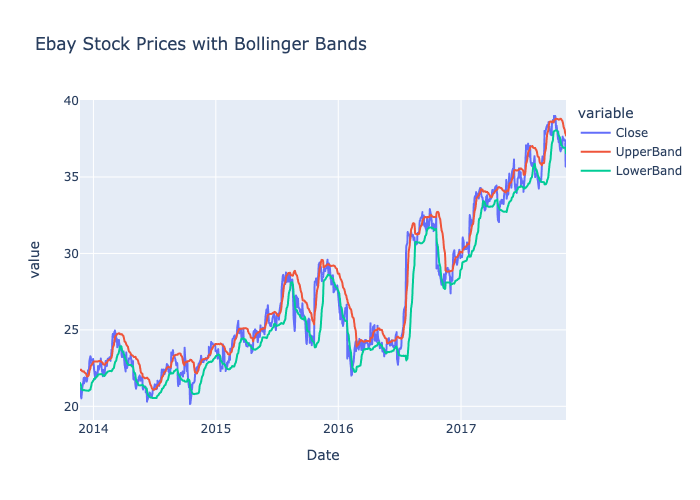

In [5]:
import plotly.express as px

fig = px.line(data[-1000:], x="Date", y=['Close', 'UpperBand', 'LowerBand'],
              title='Ebay Stock Prices with Bollinger Bands')

#fig.show() #to allow scaling
fig.show('png')

In [6]:
data['Diff'] = - data['Close'] + data['Close'].shift(-1)
data['Class'] = data['Diff'].apply(lambda x: 1 if x >= 0 else -1)
data

,Date,Open,High,Low,Close,Volume,OpenInt,TP,UpperBand,LowerBand,Diff,Class
0,1998-09-24,0.9386,0.9512,0.7744,0.8333,518827162,0,0.907700,NaN,NaN,-0.0463,-1
1,1998-09-25,0.7997,0.8123,0.7239,0.7870,121461120,0,0.799667,NaN,NaN,0.0590,1
2,1998-09-28,0.8333,0.8923,0.8081,0.8460,89909741,0,0.857200,NaN,NaN,0.0126,1
3,1998-09-29,0.8670,0.8838,0.8375,0.8586,39580358,0,0.869800,NaN,NaN,-0.0674,-1
4,1998-09-30,0.8291,0.8418,0.7576,0.7912,44227814,0,0.820700,NaN,NaN,-0.0883,-1
...,...,...,...,...,...,...,...,...,...,...,...,...
4809,2017-11-06,37.3800,37.6100,37.3000,37.3700,4360973,0,37.453333,38.100655,36.911345,0.0400,1
4810,2017-11-07,37.6000,37.6000,37.2250,37.4100,5646049,0,37.536667,37.939532,36.929468,-0.4000,-1
4811,2017-11-08,37.3000,37.3700,36.9400,37.0100,7092705,0,37.226667,37.838278,36.900722,-1.3200,-1
4812,2017-11-09,36.2600,36.3600,35.2100,35.6900,16991775,0,36.103333,37.820229,36.678771,0.2700,1


In [7]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

data = data.dropna()
X = np.array(data[['UpperBand', 'LowerBand']])[:-3]
y = np.array(data['Class'].shift(-3))[:-3]

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3, shuffle=False)
reg = SVC().fit(X_train, y_train)

y_pred = reg.predict(X_test)

from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

        -1.0       0.49      0.60      0.54       692
         1.0       0.53      0.43      0.48       746

    accuracy                           0.51      1438
   macro avg       0.51      0.51      0.51      1438
weighted avg       0.51      0.51      0.51      1438



In [12]:
from sklearn.model_selection import cross_val_score

cross_val_score(SVC(), X, y, scoring='f1').mean()

0.4580111568392623

# Find Optimal Parameters of SVC


--------------------------------------------------------------
|                      Task Description                      |
--------------------------------------------------------------
|                  dimension:  2                             |
|                     bounds:  [[1.0, 6.0], [-7.0, -3.0]]    |
|   objective-function count:  1                             |
|  constraint-function count:  0                             |
--------------------------------------------------------------
|                     Method Parameters                      |
--------------------------------------------------------------
|                        eps:  0.01                          |
|                          r:  3.0                           |
|                      eps_r:  0.01                          |
|                iters_limit:  100                           |
|  number_of_parallel_points:  1                             |
------------------------------------------------------

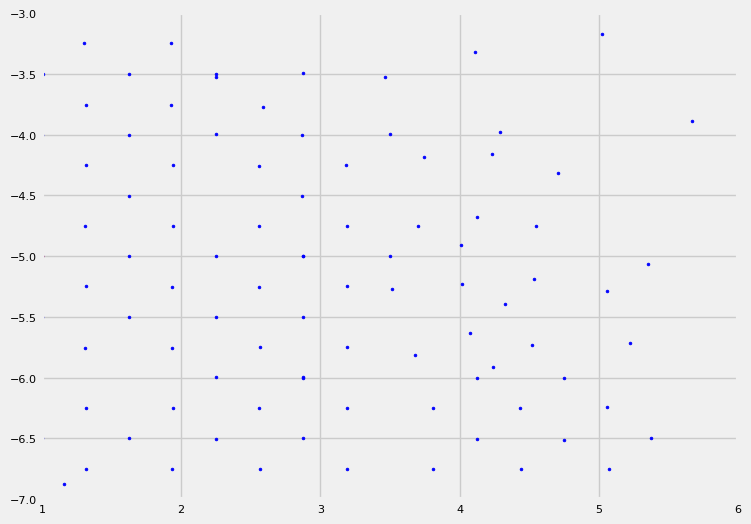

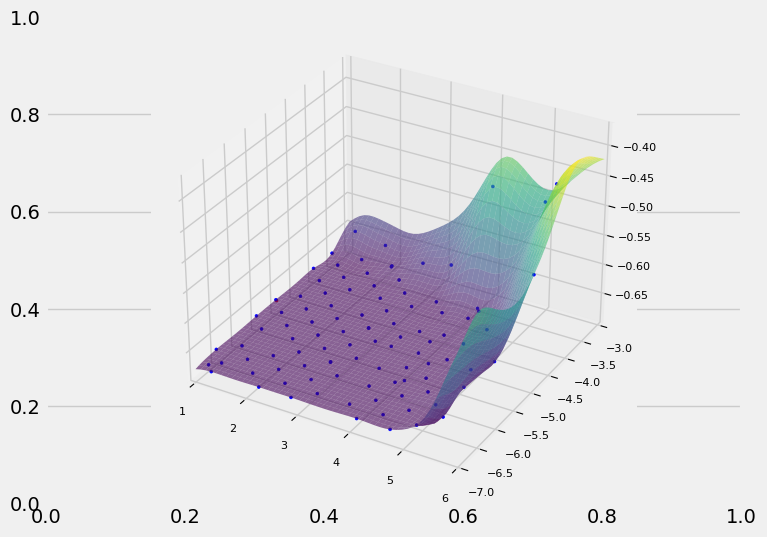

--------------------------------------------------------------
|                           Result                           |
--------------------------------------------------------------
|     global iteration count:  100                           |
|      local iteration count:  0                             |
|               solving time:  515.266004                    |
|             solution point:  [ 1.00244141 -4.99804688]     |
|             solution value:  -0.67523835                   |
|                   accuracy:  0.06250000                    |
--------------------------------------------------------------


In [8]:
from iOpt.output_system.listeners.static_painters import StaticPainterNDListener
from iOpt.output_system.listeners.animate_painters import AnimatePainterNDListener
from iOpt.output_system.listeners.console_outputers import ConsoleOutputListener

from iOpt.solver import Solver
from iOpt.solver_parametrs import SolverParameters
from examples.Machine_learning.SVC._2D.Problems import SVC_2d
import numpy as np

regularization_value_bound = {'low': 1, 'up': 6}
kernel_coefficient_bound = {'low': -7, 'up': -3}

problem = SVC_2d.SVC_2D(X, y, regularization_value_bound, kernel_coefficient_bound)

method_params = SolverParameters(r=np.double(3.0), iters_limit=100)
solver = Solver(problem, parameters=method_params)

apl = AnimatePainterNDListener("svc2d_anim.png", "output", vars_indxs=[0, 1], to_paint_obj_func=False)
solver.add_listener(apl)

spl = StaticPainterNDListener("svc2d_stat.png", "output", vars_indxs=[0, 1], mode="surface", calc="interpolation")
solver.add_listener(spl)

cfol = ConsoleOutputListener(mode='full')
solver.add_listener(cfol)

solver_info = solver.solve()